# MWT - Data Science - wiki4HE

Il set di dati __wiki4HE__ contiene informazioni su un questionario proposto a dei professori universitari, ai quali è stato chiesto di rispondere a delle domande sull'utilizzo di Wikipedia come risorsa didattica.

Il dataset è composto da due sottoinsiemi contenenti i dati demografici degli intervistati e le relative risposte alle domande poste loro.
I professori che si sono sottoposti al sondaggio appartengono a due diverse università spagnole, ovvero la _Universitat Oberta de Catalunya_ e la _Universitat Pompeu Fabra_, e sono specializzati in diversi ambiti accademici.
La scala dei valori delle risposte all'indagine variano da 1 a 5, dove 1 rappresenta il totale disaccordo con l'affermazione e 5 il viceversa.

Il lavoro su questo dataset si suddividerà in steps nei quali si analizzeranno i dati, in seguito questi verranno combinati così da incrementare le informazioni a disposizione per l'addestramento ed infine verrà eseguita una gestione degli eventuali dati mancanti.
Ci si soffermerà anche sul confronto fra le funzioni ottimizzate delle librerie importate e alcune funzioni, dichiarate in Python sfruttando il linguaggio e i suoi costrutti, che vanno a simulare le prime.

Lo scopo ultimo di questo elaborato è quello di utilizzare questo dataset per l'addestramento di una macchina capace di predirre le risposte sull'utilizzo di Wikipedia come stumento per l'integrazione del materiale didattico da parte degli studenti, questo sarà possibile analizzando le caratteristiche dei professori e delle risposte date da ognuno di essi.
Nel dataset sono presenti domande specifiche che danno una risposta all'obiettivo della predizione, per questo motivo verranno escluse dal set di dati utilizato per l'addestramento.

## Indice:
1. Import del Dataset e analisi preliminari
2. Manipolazione e pulizia (Data Wrangling)
    1. Valutazione dei NaN
    2. Divisione del set
        1. Professori
        2. Questionario
3. Preparazione Modello ML



# Import del Dataset e analisi preliminari
Dopo aver importato il dataset, è stato sostituito il carattere "?" che rappresenta una risposta mancante con il valore NaN di numpy.

Viene eseguita una stampa dei primi campioni per ottenere una visione generica del dataset che si sta analizzando e in seguito vengono stampate le informazioni generali relative alla dimensione e ai tipi di ogni attributo del set di dati.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import main

data = pd.read_csv('dataset/uci - missing data/wiki4HE/wiki4HE.csv', sep=';')
pd.set_option('display.max_columns', 54)
data.replace('?', np.nan, inplace=True)
#stampa delle prime righe
print(data.head())

   AGE  GENDER DOMAIN  PhD YEARSEXP  UNIVERSITY UOC_POSITION OTHER_POSITION  \
0   40       0      2    1       14           1            2            NaN   
1   42       0      5    1       18           1            2            NaN   
2   37       0      4    1       13           1            3            NaN   
3   40       0      4    0       13           1            3            NaN   
4   51       0      6    0        8           1            3            NaN   

  OTHERSTATUS USERWIKI PU1 PU2 PU3 PEU1 PEU2 PEU3 ENJ1 ENJ2 Qu1 Qu2 Qu3 Qu4  \
0         NaN        0   4   4   3    5    5    3    4    4   3   3   2   2   
1         NaN        0   2   3   3    4    4    3    3    4   4   4   3   3   
2         NaN        0   2   2   2    4    4    3    3    3   2   2   2   5   
3         NaN        0   3   3   4    3    3    3    4    3   3   4   3   3   
4         NaN        1   4   3   5    5    4    3    4    4   4   5   4   3   

  Qu5 Vis1 Vis2 Vis3 Im1 Im2 Im3 SA1 SA2 SA3 Use1 

In [2]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          911 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        890 non-null    object
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    800 non-null    object
 7   OTHER_POSITION  652 non-null    object
 8   OTHERSTATUS     373 non-null    object
 9   USERWIKI        909 non-null    object
 10  PU1             906 non-null    object
 11  PU2             902 non-null    object
 12  PU3             908 non-null    object
 13  PEU1            909 non-null    object
 14  PEU2            899 non-null    object
 15  PEU3            816 non-null    object
 16  ENJ1            906 non-null    object
 17  ENJ2            896 non-null    object
 18  Qu1       


# Manipolazione e pulizia (Data Wrangling

##  Valutazione dei NaN

Ai fini dell'organizzazione del lavoro di pulizia, risulta interessante capire quanti e dove sono presenti i valori Nan.
Si puo notare che la maggior parte delle istanze ha almeno un valore NaN, per questo motivo risulta utile visionare il conteggio degli NaN per ogni attributo


In [3]:
# numero di righe con almeno un na:
data.shape[0] - data.dropna().shape[0]

737

In [4]:
#numero di na per ogni attributo
pd.DataFrame({ 'contain na ': data.isna().any() ,'number of na ': data.isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,True,2
PhD,False,0
YEARSEXP,True,23
UNIVERSITY,False,0
UOC_POSITION,True,113
OTHER_POSITION,True,261
OTHERSTATUS,True,540
USERWIKI,True,4


## Divisione del set

Data la struttura del dataset, è possibile lavorare separando i dati demografici dei professori dalle domande del questionario. Per questo motivo dividiamo il set in due sottoinsiemi che chiameremo ___"Prof"___ e ___"Questionario"___

In [5]:
prof = data.iloc[:, :10]
questionario = data.iloc[:, 10:]

## Professori

Questo sottoinsieme raccoglie varie informazioni relative ai professori:
- Età
- Genere
- Dominio
- Anni di esperienza da professore
- In possesso di PhD
- Università di appartenenza
- Posizione lavorativa ricoperta in UOC
- Se insegna in altri Istituiti Universitari
- Posizione lavorativa presso altre Università e dipendente di UPF
- Utente registrato su Wikipedia

Per avere una visione più puntale del sottoinsieme in lavorazione risulta essere vantaggioso la costruzione di plot descrittivi

### Grafici

count    913.000000
mean       0.464403
std        0.499005
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: PhD, dtype: float64

<AxesSubplot:xlabel='YEARSEXP', ylabel='Count'>

<Figure size 720x360 with 0 Axes>

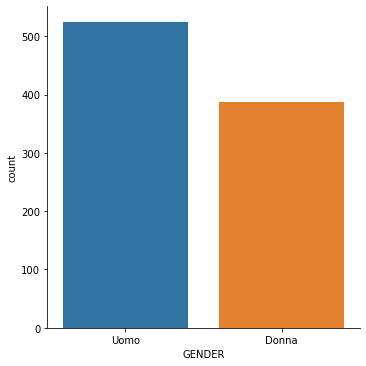

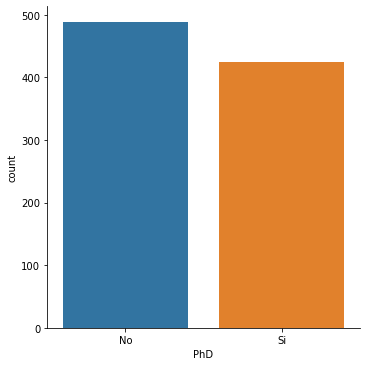

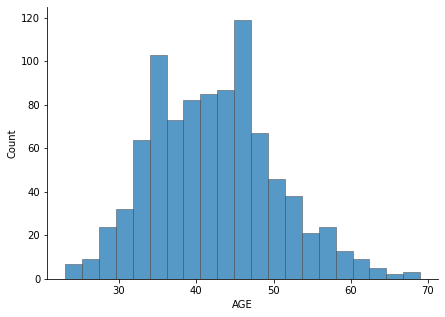

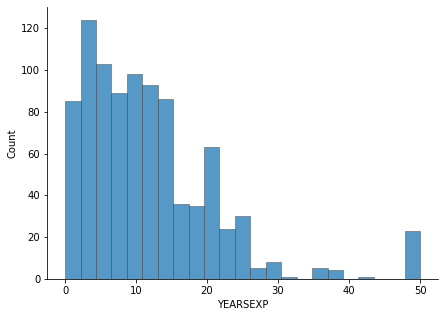

In [25]:
fig = plt.figure(figsize = (16,10))

f_gender = sns.catplot(x="GENDER", kind="count", data=prof)
f_gender.set_xticklabels(["Uomo", "Donna"])


ax = fig.add_subplot(2, 3, 1)
counts, bins, patches = ax.hist(prof['PhD'].map({0: 'No', 1: 'Si'}), bins = 3)
ax.set_title("Hanno PhD?", fontsize = 14)
ax.set_ylabel("Quantidade de prof")
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([0, 250, 500, 750, ">1000"])

f_phd = sns.catplot(x="PhD", kind="count", data=prof)
f_phd.set_xticklabels(["No", "Si"])


f_age, ax_age = plt.subplots(figsize=(7, 5))
sns.despine(f_age)
sns.histplot(
    prof,
    x="AGE",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

f_exp, ax_exp = plt.subplots(figsize=(7, 5))
sns.despine(f_exp)
sns.histplot(
    prof.fillna(50).astype(int),
    x="YEARSEXP",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

In [ ]:
# fig = plt.figure(figsize = (16,10))
#
# g = sns.catplot(x="GENDER", kind="count", data=prof)
# g.set_xticklabels(["Uomo", "Donna"])

# fig1, axs1 = plt.subplots(ncols=3)
# fig2, axs2 = plt.subplots(ncols=2)
#
# #AGE  GENDER DOMAIN  PhD YEARSEXP  UNIVERSITY UOC_POSITION OTHER_POSITION OTHERSTATUS USERWIKI
#
# f_gender = sns.catplot(x="GENDER", kind="count", data=prof, ax=axs1[0])
# f_gender.set_xticklabels(["Uomo", "Donna"])
#
# f_age = sns.histplot(x="AGE", data=prof, ax=axs2[1])


[Text(0, 0, '0'),
 Text(0, 100, '100'),
 Text(0, 200, '200'),
 Text(0, 300, '300'),
 Text(0, 400, '>400')]

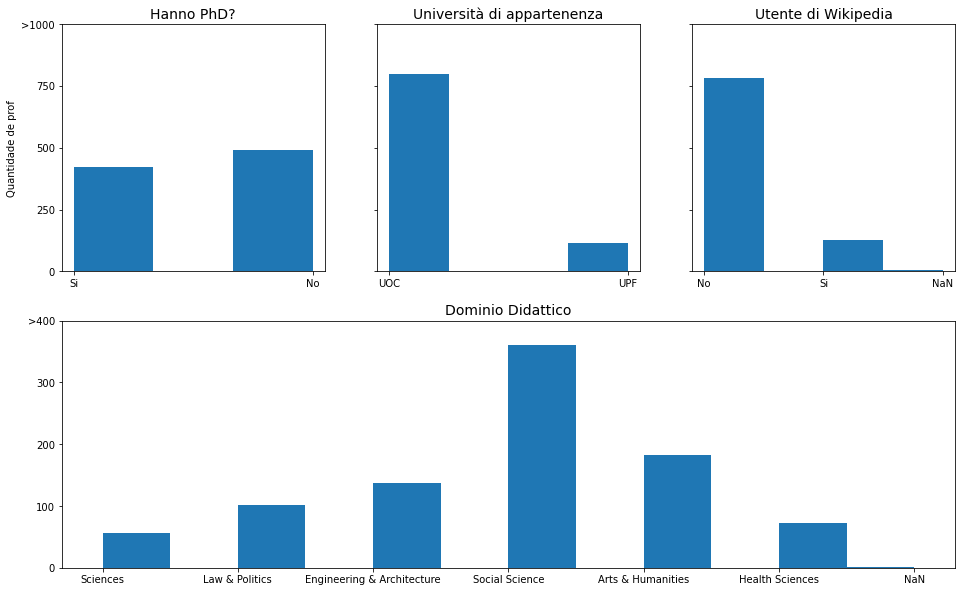

In [38]:

fig = plt.figure(figsize = (16,10))

ax = fig.add_subplot(2, 3, 1)
counts, bins, patches = ax.hist(prof['PhD'].map({0: 'No', 1: 'Si'}), bins = 3)
ax.set_title("Hanno PhD?", fontsize = 14)
ax.set_ylabel("Quantidade de prof")
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([0, 250, 500, 750, ">1000"])

ax = fig.add_subplot(2, 3, 2)
ax.hist(prof['UNIVERSITY'].fillna(0).astype(int).map({0:'NaN', 1: 'UOC', 2: 'UPF'}), bins = 4)
ax.set_title("Università di appartenenza", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""])

ax = fig.add_subplot(2, 3, 3)
ax.hist(prof['USERWIKI'].fillna(2).astype(int).map({0: 'No', 1: 'Si', 2:'NaN'}), bins = 4)
ax.set_title("Utente di Wikipedia", fontsize = 14)
ax.set_ylim((0, 1000))
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([ "",  "",  "",  "", ""])

ax = fig.add_subplot(2, 1, 2)
ax.hist(prof['DOMAIN'].fillna(7).astype(int).map({1: "Arts & Humanities", 2:"Sciences", 3:"Health Sciences",
                                   4:"Engineering & Architecture", 5:"Law & Politics",
                                   6:"Social Science", 7:'NaN'}), bins = 12)
ax.set_title("Dominio Didattico", fontsize = 14)
ax.set_ylim((0, 400))
ax.set_yticks([0, 100, 200, 300, 400])
ax.set_yticklabels([0, 100, 200, 300, ">400"])